# libraries

In [ ]:
!pip install Sastrawi
!pip install contractions

     |████████████████████████████████| 209 kB 12.0 MB/s 
     |████████████████████████████████| 284 kB 13.2 MB/s 
     |████████████████████████████████| 321 kB 47.3 MB/s 
  Created wheel for pyahocorasick: filename=pyahocorasick-1.4.2-cp37-cp37m-linux_x86_64.whl size=85453 sha256=95b7ee76086a0070667ad4acd4ea2e859e0253aba97ab0b9b5da5bc61086b5b5
  Stored in directory: /root/.cache/pip/wheels/25/19/a6/8f363d9939162782bb8439d886469756271abc01f76fbd790f
Successfully built pyahocorasick


In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import tensorflow
print(tensorflow.__version__)

2.7.0


In [ ]:
import xlrd

# preprocessing func

In [ ]:
#removes html
def strip_html(text):
  soup = BeautifulSoup(text, "html.parser")
  return soup.get_text()
  
#remove between square brackets
def remove_between_square_brackets(text):
    return re.sub('\[[^]]*\]', '', text)

#eliminates contractions
def replace_contractions(text):
  """Replace contactions in string of text"""
  return contractions.fix(text)

#denoise text
def denoise_text(text):
  text = strip_html(text)
  text = remove_between_square_brackets(text)
  text = replace_contractions(text)
  return text

In [ ]:
factoryStopword = StopWordRemoverFactory()
stopword = factoryStopword.create_stop_word_remover()
stop_factory = StopWordRemoverFactory().get_stop_words()

def get_stopwords():
  docs = pd.read_csv('/content/stopwords-id.txt', header = None, names= ['stopword'])
  docs = docs['stopword'].tolist()
  return docs

stop_words = get_stopwords()

# Merge stopword
data = set(stop_factory + stop_words)

#remove stopword
def removeStopword(str):
    word_tokens = word_tokenize(str)
    filtered_sentence = [w for w in word_tokens if not w in data]
    return ' '.join(filtered_sentence)

In [ ]:
#cleaning dataset
def cleaning(str):
    #remove non-ascii
    str = unicodedata.normalize('NFKD', str).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    str = re.sub("b'|b\"",'',str)
    #remove username inside brackets
    str = re.sub('SENSITIVE-NO',' ',str) 
    #Remove additional white spaces
    str = re.sub('[\s]+', ' ', str)
    #remove URLs
    str = re.sub(r'(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:\'".,<>?«»“”‘’]))', '', str)
    #remove punctuations
    str = re.sub(r'[^\w]|_',' ',str)
    #remove digit from string
    str = re.sub("\S*\d\S*", "", str).strip()
    #remove digit or numbers
    str = re.sub(r"\b\d+\b", " ", str)
    #to lowercase
    str = str.lower()
    return str

In [ ]:
#remove twitter symbols
def remove_symbols(str):
  #remove RT
  str = re.sub ('RT', '', str)
  #remove @username
  str = re.sub('@[^\s]+', '', str)
  return str

In [ ]:
#normalization of words
normalisasi = pd.read_csv('kamus.csv', encoding = 'latin-1')
normalisasi_map = dict(zip(normalisasi['original'], normalisasi['replacement']))
def normalizing(text):
  return ' '.join([normalisasi_map[word] if word in normalisasi_map else word for word in text.split(' ')])

In [ ]:
factoryStemmer = StemmerFactory()
stemmer = factoryStemmer.create_stemmer()

def stemming(text):
  return stemmer.stem(text)

In [ ]:
#preprocessing dataset function
def preprocessing(str):
  str = remove_symbols(str)
  str = denoise_text(str)
  str = normalizing(str)
  str = cleaning(str)
  #str = stemming(str)
  str = normalizing(str)
  str = cleaning(str)
  return str

In [ ]:
print(preprocessing('Gelatine Sheet (Bronze) / Gelatine lembaran HALAL (PER 5 LEMBAR) <br><br> @sere_nity'))
print(preprocessing('polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews.com'))
print(preprocessing('Dokter Sebut Penanganan Rekonstruksi Bayi Dina Oktavia akan Dilakukan Sampai Usia 17 tahun - Halaman 4 - www.tribunnews.com'))
print(preprocessing('Misteri Kematian Hakim Jamaluddin Saat Akan Bercerai, Istri Sudah 7 Kali Diperiksa Polisi - www.voaindonesia.com'))
print(preprocessing('uuuu neo coffee (nctzen/neotizen comment beautiful grass 🤩)'))
print(preprocessing('mengsedih'))

gelatine sheet bronze gelatine lembaran halal per lembar
polisi tembak mati kurir narkotika psikotropika dan obat larang temu kg sabu pil inex gudang narkotika sidoarjo tribunnews com
dokter sebut penanganan rekonstruksi bayi dina oktavia akan dilakukan sampai usia tahun halaman
misteri kematian hakim jamaluddin saat akan bercerai istri sudah kali diperiksa polisi
uuuu neo coffee nctzen neotizen komen cantik grass
mengsedih


# modeling

In [ ]:
#import needed libraries
import re
import string
import unicodedata
import nltk
import inflect
import pickle
import contractions
import tensorflow
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from bs4 import BeautifulSoup
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist
from nltk.stem import PorterStemmer
from nltk import tokenize

from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory

from tensorflow import keras 
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras import layers, initializers
from tensorflow.keras.models import Sequential, load_model, Model
from tensorflow.keras.layers import Concatenate, Input, Embedding, LSTM, Attention, Dense, Dropout, Bidirectional, LSTM, Flatten, Conv1D, GlobalMaxPool1D, MaxPool1D, Reshape, GlobalAveragePooling1D, UpSampling1D, Layer
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, Nadam, SGD, RMSprop
from datetime import datetime

from keras import initializers
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential, save_model, load_model
from keras.layers import Dense, Embedding, Dropout, LSTM, Bidirectional, GRU, GlobalMaxPool1D
from keras.utils.np_utils import to_categorical
from keras.backend import clear_session

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, f1_score, precision_score, recall_score
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import LinearSVC
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
print(keras.__version__)
print(tensorflow.__version__)

2.7.0
2.7.0


In [ ]:
#load data
df = pd.read_csv('/content/jnt.csv')
df

,text,label,ytrue
0,setelah melihat kekacauan jnt aku jadi takut s...,neu,neu
1,jnt lagi ada masalah apa sudah ini paket sudah...,pos,neg
2,jnt tidak ada perubahan sama sekali jujur kese...,pos,neg
3,aku chat wasap ke jnt kak,neu,neu
4,benar benar sekarang bukan seram seller lagi t...,neg,neg
...,...,...,...
4548,halo admin apakah tanggal jnt masih menerima p...,pos,NaN
4549,senasib jnt itu bagaimana iya tertawa bil send...,pos,NaN
4550,kira kira bakal sampai kemana dulu jnt lawan s...,pos,neu
4551,tidak mintak banyak nak mintak abang jnt jagak...,neu,NaN


In [ ]:
# delete unused column
df = df.drop(columns = ['label'])
df

,text,ytrue
0,setelah melihat kekacauan jnt aku jadi takut s...,neu
1,jnt lagi ada masalah apa sudah ini paket sudah...,neg
2,jnt tidak ada perubahan sama sekali jujur kese...,neg
3,aku chat wasap ke jnt kak,neu
4,benar benar sekarang bukan seram seller lagi t...,neg
...,...,...
4548,halo admin apakah tanggal jnt masih menerima p...,NaN
4549,senasib jnt itu bagaimana iya tertawa bil send...,NaN
4550,kira kira bakal sampai kemana dulu jnt lawan s...,neu
4551,tidak mintak banyak nak mintak abang jnt jagak...,NaN


In [ ]:
# dropping nan columns
df = df.dropna()

In [ ]:
df

,text,ytrue
0,setelah melihat kekacauan jnt aku jadi takut s...,neu
1,jnt lagi ada masalah apa sudah ini paket sudah...,neg
2,jnt tidak ada perubahan sama sekali jujur kese...,neg
3,aku chat wasap ke jnt kak,neu
4,benar benar sekarang bukan seram seller lagi t...,neg
...,...,...
4511,terima kasih jnt berkat anda pengiriman saya b...,neg
4517,lazada enaknya pas retur barang ada yang berma...,neg
4528,ini aku lawan abang jnt alias abangnya kayak a...,neg
4531,jnt parah banget mengirim ng bali sudah seming...,neg


In [ ]:
len(df)

1242

In [ ]:
# detecting duplicated data
df.duplicated().sum()

0

In [ ]:
#delete duplicated data
df = df.drop_duplicates(subset = 'text', keep = 'last')
df.duplicated().sum()

0

In [ ]:
# reset index
df = df.reset_index(drop=True)
df

,text,ytrue
0,setelah melihat kekacauan jnt aku jadi takut s...,neu
1,jnt lagi ada masalah apa sudah ini paket sudah...,neg
2,jnt tidak ada perubahan sama sekali jujur kese...,neg
3,aku chat wasap ke jnt kak,neu
4,benar benar sekarang bukan seram seller lagi t...,neg
...,...,...
1237,terima kasih jnt berkat anda pengiriman saya b...,neg
1238,lazada enaknya pas retur barang ada yang berma...,neg
1239,ini aku lawan abang jnt alias abangnya kayak a...,neg
1240,jnt parah banget mengirim ng bali sudah seming...,neg


In [ ]:
#convert label string to categorical
df.dropna(inplace = True)
df['label_id'] = df['ytrue'].factorize()[0]
kategori_id = df[['ytrue', 'label_id']].drop_duplicates().sort_values('label_id')
kategori_to_id = dict(kategori_id.values)
id_to_kategori = dict(kategori_id[['label_id', 'ytrue']].values)

#show data id_to_kategori
id_to_kategori

{0: 'neu', 1: 'neg', 2: 'pos'}

neg    1074
neu      95
pos      73
Name: ytrue, dtype: int64

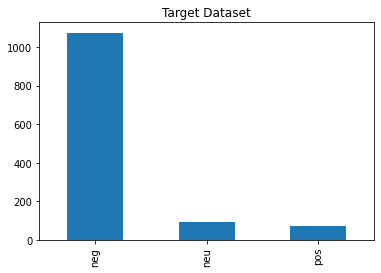

In [ ]:
#knowing dataset counts
target = df['ytrue'].value_counts()
target.plot(kind='bar', title='Target Dataset')

#show dataset
target

In [ ]:
#balancing dataset
class_0, class_1, class_2= df['label_id'].value_counts()

class_0, class_1, class_2

(1074, 95, 73)

Random samping: 
neg    73
neu    73
pos    73
Name: ytrue, dtype: int64
Total sentences:  219


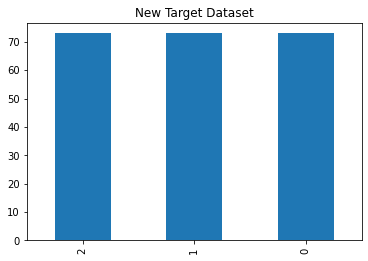

In [ ]:
dataset_class_0 = df[df['label_id'] == 0]
dataset_class_1 = df[df['label_id'] == 1]
dataset_class_2 = df[df['label_id'] == 2]

#making dataset as much as label 2
dataset_class_0 = dataset_class_0.sample(class_2)
dataset_class_1 = dataset_class_1.sample(class_2)
dataset_class_2 = dataset_class_2.sample(class_2)

df = pd.concat([dataset_class_0, dataset_class_1, dataset_class_2], axis=0)

print("Random samping: ")
print(df.ytrue.value_counts())

df.label_id.value_counts().plot(kind='bar', title='New Target Dataset')
print('Total sentences: ', len(df))

In [ ]:
df

,text,ytrue,label_id
552,mencuba nasib untuk trade only have jaemin jc ...,neu,0
880,maukkk apa ini makjiii apa saja mau aku mah di...,neu,0
1103,jnt income sudah banyak masa tidak bisa bayar ...,neu,0
856,hai aku open jasa admin packing dom serang ban...,neu,0
1082,oke paket saya di jnt sih terima kasih by,neu,0
...,...,...,...
654,si cepat jnt di daerah kosanku amanah aman pula,pos,2
155,menye jnt sih cepat olaf,pos,2
151,diaku jnt sih adanya semoga baik baik saja sok...,pos,2
907,terima kasih ayah jnt bagi air roti,pos,2


In [ ]:
# saving balance data
# format [keywrods]-splitted.csv
df.to_csv('jnt-splitted.csv', sep = ',', encoding = 'utf-8', index = False)

In [ ]:
#checking dataset value
label = df['label_id'].values
text = df['text'].values

print('Value of [label_id]:', label, "\n")
print('Value of [text]:', text)

Value of [label_id]: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2] 

Value of [text]: ['mencuba nasib untuk trade only have jaemin jc kiri want jeno jc kanan condition tip top on hand and fresh pulled must post the sama day as me using poslaju jnt pack elok elok and secured tanak juai nah jangan direct message tanya harga pasarnctmy pasarnct'
 'maukkk apa ini makjiii apa saja mau aku mah di noticee makjii juga mauuuuuuuu sayang hai aku makjii btww aku semalam mimpi makji direct message aku buat menitip lontong balap terus meminta dikirim via jnt donggg'
 'jnt income sudah banyak masa tidak bisa

In [ ]:
label

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [ ]:
#max features
maxfeatures = 20000

#tokenization
tokenizer = Tokenizer(num_words = maxfeatures)
tokenizer.fit_on_texts(text)

In [ ]:
#max sequential per word in NN
maxseqlen = max([len(i.split()) for i in text])
print(maxseqlen)

57


In [ ]:
X = tokenizer.texts_to_sequences(text)
X = pad_sequences(X, maxlen = maxseqlen)
y = to_categorical(label, num_classes = 3)

print("Shape of data tensor ['text']:", X.shape)
print("Shape of data tensor ['label']:", y.shape)

Shape of data tensor ['text']: (219, 57)
Shape of data tensor ['label']: (219, 3)


In [ ]:
#tokening word index
idx_token = tokenizer.word_index
idx_token

{'jnt': 1,
 'yang': 2,
 'di': 3,
 'tidak': 4,
 'sudah': 5,
 'aku': 6,
 'ini': 7,
 'saya': 8,
 'iya': 9,
 'paket': 10,
 'saja': 11,
 'ada': 12,
 'banget': 13,
 'juga': 14,
 'cepat': 15,
 'nya': 16,
 'sampai': 17,
 'kalau': 18,
 'direct': 19,
 'message': 20,
 'sih': 21,
 'kasih': 22,
 'itu': 23,
 'ke': 24,
 'terima': 25,
 'sama': 26,
 'dan': 27,
 'dari': 28,
 'lagi': 29,
 'kurir': 30,
 'mau': 31,
 'bisa': 32,
 'pakai': 33,
 'kamu': 34,
 'tapi': 35,
 'rumah': 36,
 'tetapi': 37,
 'hari': 38,
 'apa': 39,
 'orang': 40,
 'barang': 41,
 'ramah': 42,
 'terus': 43,
 'kak': 44,
 'padahal': 45,
 'memang': 46,
 'lama': 47,
 'begini': 48,
 'jadi': 49,
 'karena': 50,
 'begitu': 51,
 'semua': 52,
 'amanah': 53,
 'jne': 54,
 'lain': 55,
 'kayak': 56,
 'belum': 57,
 'ku': 58,
 'baik': 59,
 'anjing': 60,
 'banyak': 61,
 'ekspedisi': 62,
 'dulu': 63,
 'aman': 64,
 'cuma': 65,
 'paling': 66,
 'jangan': 67,
 'sering': 68,
 'kurirnya': 69,
 'bahkan': 70,
 'ya': 71,
 'kemarin': 72,
 'tadi': 73,
 'masih': 74,


In [ ]:
#determine vocab data used
vocab = max([len(idx_token)]) + 1
vocab

1367

In [ ]:
#initializer
initializer = initializers.RandomUniform(minval = -0.05, maxval = 0.05, seed = 2)

#split dataset
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size = 0.15, random_state = 128)

print(Xtrain.shape, ytrain.shape)
print(Xtest.shape, ytest.shape)

(186, 57) (186, 3)
(33, 57) (33, 3)


In [ ]:
ytrain

array([[1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [1., 0., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1

In [ ]:
y

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

In [ ]:
#architecture model of GRU
model = Sequential()
model.add(Embedding(input_dim = maxfeatures, output_dim = 128, input_length = maxseqlen, embeddings_initializer = initializer))
model.add(GRU(64, return_sequences = True, kernel_initializer = initializer))
model.add(GlobalMaxPool1D())
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(16, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(5, activation='relu'))
model.add(Dropout(0.1))
model.add(Dense(3, activation='softmax'))


opt = tensorflow.keras.optimizers.RMSprop(learning_rate=0.001, rho=0.9, momentum=0.0)
model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 57, 128)           2560000   
                                                                 
 gru_1 (GRU)                 (None, 57, 64)            37248     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                      

In [ ]:
#declare checkpoint variable and early stopping to get best model
early_stop = EarlyStopping(monitor = 'val_accuracy', patience = 3)

In [ ]:
#training model
start_time = datetime.now()
history = model.fit(Xtrain, ytrain,
                    batch_size = 8, epochs = 25, shuffle = True,
                    validation_split = 0.1, verbose = 1,
                    callbacks=early_stop)
end_time = datetime.now()
print("Time out: {}".format(end_time - start_time))

Epoch 1/25
21/21 [==============================] - 4s 45ms/step - loss: 1.0988 - accuracy: 0.3533 - val_loss: 1.0901 - val_accuracy: 0.3684
Epoch 2/25
21/21 [==============================] - 0s 17ms/step - loss: 1.0897 - accuracy: 0.4251 - val_loss: 1.0567 - val_accuracy: 0.6316
Epoch 3/25
21/21 [==============================] - 0s 18ms/step - loss: 1.0556 - accuracy: 0.5150 - val_loss: 1.0018 - val_accuracy: 0.6842
Epoch 4/25
21/21 [==============================] - 0s 18ms/step - loss: 1.0036 - accuracy: 0.5329 - val_loss: 0.9523 - val_accuracy: 0.7368
Epoch 5/25
21/21 [==============================] - 0s 18ms/step - loss: 0.9208 - accuracy: 0.6587 - val_loss: 0.8464 - val_accuracy: 0.8421
Epoch 6/25
21/21 [==============================] - 0s 18ms/step - loss: 0.7839 - accuracy: 0.6826 - val_loss: 0.6979 - val_accuracy: 0.8421
Epoch 7/25
21/21 [==============================] - 0s 17ms/step - loss: 0.6484 - accuracy: 0.7784 - val_loss: 0.6333 - val_accuracy: 0.8421
Epoch 8/25
21

In [ ]:
#build eveluation function
def evaluation(model, X, Y):
  global Y_pred, Y_act
  Y_pred = model.predict(X)
  Y_pred_class = np.argmax(Y_pred, axis=1)
  rounded_labels=np.argmax(Y, axis=1)
  Y_act = rounded_labels
  
  accuracy = accuracy_score(Y_act, Y_pred_class)
  return accuracy

In [ ]:
accuracy = evaluation(model, Xtest, ytest)
print('accuracy: %.3f' % (accuracy * 100), '%')

accuracy: 66.667 %


In [ ]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
print("confusion matrix: \n", confusion_matrix(Y_act, np.argmax(Y_pred, axis = 1)))

# Accuracy
print("accuracy: ", accuracy_score(Y_act, np.argmax(Y_pred, axis = 1)))

# Recall
from sklearn.metrics import recall_score
print("recall: ", recall_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

# Precision
from sklearn.metrics import precision_score
print("precission: ", precision_score(Y_act, np.argmax(Y_pred, axis = 1), average=None))

confusion matrix: 
 [[6 1 0]
 [1 7 5]
 [2 2 9]]
accuracy:  0.6666666666666666
recall:  [0.85714286 0.53846154 0.69230769]
precission:  [0.66666667 0.7        0.64285714]


In [ ]:
# mounting with google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# saving pickle and h5 model
import pickle
with open('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/gru-jnt.pickle', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

model.save('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/gru-jnt.h5')

In [ ]:
# load h5 model
model = load_model('/content/drive/MyDrive/College/Careers/Accepted Job/04 Solusi247 - Data Scientist/Jobs/datas and guidelines/gru-jnt.h5')

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_1 (Embedding)     (None, 57, 128)           2560000   
                                                                 
 gru_1 (GRU)                 (None, 57, 64)            37248     
                                                                 
 global_max_pooling1d_1 (Glo  (None, 64)               0         
 balMaxPooling1D)                                                
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dropout_3 (Dropout)         (None, 32)                0         
                                                                 
 dense_5 (Dense)             (None, 16)                528       
                                                      

In [ ]:
#new data
test = ['paket gw dibobol dong',
        'aduh ekspedisi ruwet banget',
        'kurir baik',
        'ongkir ekspedisi berapa min',
        'cek dm dong elah min',
        'eh udah nyampe, cepet bener dah'
        ]

#expected
#neg, neg, pos, neu, neu, pos

In [ ]:
#tokenizing newdata
newdata = tokenizer.texts_to_sequences(test)
newdata = pad_sequences(newdata, maxlen = maxseqlen)

In [ ]:
model_predict = model.predict(newdata)
model_label = np.argmax(model_predict, axis = 1)
model_probability = model_predict.max(axis = 1)

In [ ]:
#proccess model into prediction and probability of newdata
model_labeled = []
model_sentence = []
model_probabilities = []
for model_unlabeled, model_label, model_probability in zip(test, model_label, model_probability):
  print('"{}"'.format(model_unlabeled))
  u = model_unlabeled
  l = id_to_kategori[model_label]
  model_labeled.append(l)
  model_sentence.append(u)
  model_probabilities.append(model_probability)

  print("  - Prediction: '{}'".format(id_to_kategori[model_label]))
  print("  - Probability: '{}'".format(model_probability))
  print("")

"paket gw dibobol dong"
  - Prediction: 'neg'
  - Probability: '0.5030671954154968'

"aduh ekspedisi ruwet banget"
  - Prediction: 'pos'
  - Probability: '0.7259972095489502'

"kurir baik"
  - Prediction: 'pos'
  - Probability: '0.6632584929466248'

"ongkir ekspedisi berapa min"
  - Prediction: 'pos'
  - Probability: '0.7294759750366211'

"cek dm dong elah min"
  - Prediction: 'neg'
  - Probability: '0.5351016521453857'

"eh udah nyampe, cepet bener dah"
  - Prediction: 'neg'
  - Probability: '0.4735351502895355'

